# I. Introduction

The intution of this notebook is to solve the problem of predicting wheather the online shoppers will create a revenue or not based on features in the Online Shoppers Purchasing Intention Dataset from UCI Repository[1].Firstly, before applying any machine learning algorithms, the dataset must be visualized to draw preliminary insights about the impact of features on dataset. Next,this notebook provides detailed explnation the for four classification algorithms namely Pocket Algorithm, Quadratic Discriminant Analysis, Linear Discriminant Analysis and Logistic Regression which are also implemented using object-oritented concepts in python and its numpy library, providing a sample testcase explaining how to use the newly implemented algorithms, visualizing the output and a metric to evaluate the model. Thereafter, the algorithms are applied to dataset in the experiment section whose results are discussed and models are compared with one another.

# II. Data


## Introduction of data for Classification & source

The dataset I chose for classification is Online Shoppers Purchasing Intention Dataset from UCI Repository[1]. This dataset 
has information about the online shoppers which can be used to classify whether the user would actually make any purchase or not, which is represented with target label 'Revenue' with True and False as values of this variable. The features which are used to analyse and classify user's intention are the  different types of pages of the online website user visits and time spent on pages namely  administrative pages, informational pages and product related pages. And the network based features like the type of traffic, Bounce rates, Exit rates, the region, the browers and operating systems of the users. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The Special Day feature indicates the closeness of the site visiting time to a specific special day. The dataset also includes  traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


## Reading the Dataset

Using read_csv function from pandas library to read the dataset into a Dataframe. Then using info function to know the 
dataset which states there are 12330 input samples and 18 features. This dataset has two boolean featues Weekend which is true if user visited website on weekend and viceversa and Revenue which is target label. There are also two object type featues which are VisitorType which provides information if a user is a returning user or new user or other and another feature being Month. All other remaing attributes are either integers or float. And checked for missing values or invalid values using isnull and isna functions from pandas library and any function from Numpy library to check, which resulted False in both the cases.
And finally using head and tail functions to see first and last five instances of dataset respectively

In [194]:
# Importing libraries pandas , matplotlib and seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data
df_onlineShoppers = pd.read_csv('./online_shoppers_intention.csv')

In [3]:
# checking the information of dataset
df_onlineShoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
# checking for null/missing values in dataset

np.any(df_onlineShoppers.isnull())

False

In [5]:
# checking for invalid values in dataset

np.any(df_onlineShoppers.isna())

False

In [6]:
# learning the information about features

df_onlineShoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# previewing first five instances

df_onlineShoppers.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
# previewing last five instances

df_onlineShoppers.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [9]:
monthdic = {'Jan': 1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 
            'Jul': 7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov': 11, 'Dec': 12}

visitorTypeDic = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
changeBoolDic = {False: -1, True:1}
df_onlineShoppers['Month'] = df_onlineShoppers['Month'].apply(lambda x: monthdic[x])
df_onlineShoppers['VisitorType'] = df_onlineShoppers['VisitorType'].apply(lambda x: visitorTypeDic[x])
df_onlineShoppers['Weekend'] = df_onlineShoppers['Weekend'].apply(lambda x: changeBoolDic[x])
df_onlineShoppers['Revenue'] = df_onlineShoppers['Revenue'].apply(lambda x: changeBoolDic[x])
df_onlineShoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,-1,-1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,-1,-1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,-1,-1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,-1,-1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,-1


## Visualization of the data

Firstly, the instances are visualized based on the count of Revenue, which is 1 if user purchased something and 0 if user did not make any purchase. And then to analyse the variations in a feature with respect to other feature, the pearson correlation is computed pairwise for all the features using corr function from pandas library and the resultant correlation dataframe is visualized as a heatmap with annoted values and colorbar showing the contrast between least related and most related features.
The pairwise scatter plots are plotted for most correlated features - 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated' and 'ProductRelated_Duration'. And the revenue is visualized during all the months with special  days and weekends.Also, during which months different types of users namely returning users, new users and others add to revenue is visualized using a scatter plot. Also, the PageValues for for different months is displyed using a scatter plot. The target variable 'Revenue' is plotted against BounceRates and ExitRates as scatterplot while plotting the ordinal features 'Opertaing System', 'Region', 'Browser', 'Traffic Type' to explore for patterns. 


In [10]:
# seting the background for seaborn plots

sns.set_style('whitegrid')

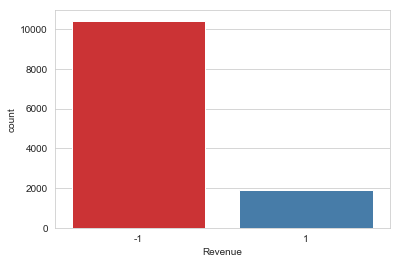

In [11]:
# plotting the count of instances which added revenue and which did not

sns.countplot(data=df_onlineShoppers , x= 'Revenue',palette='Set1')

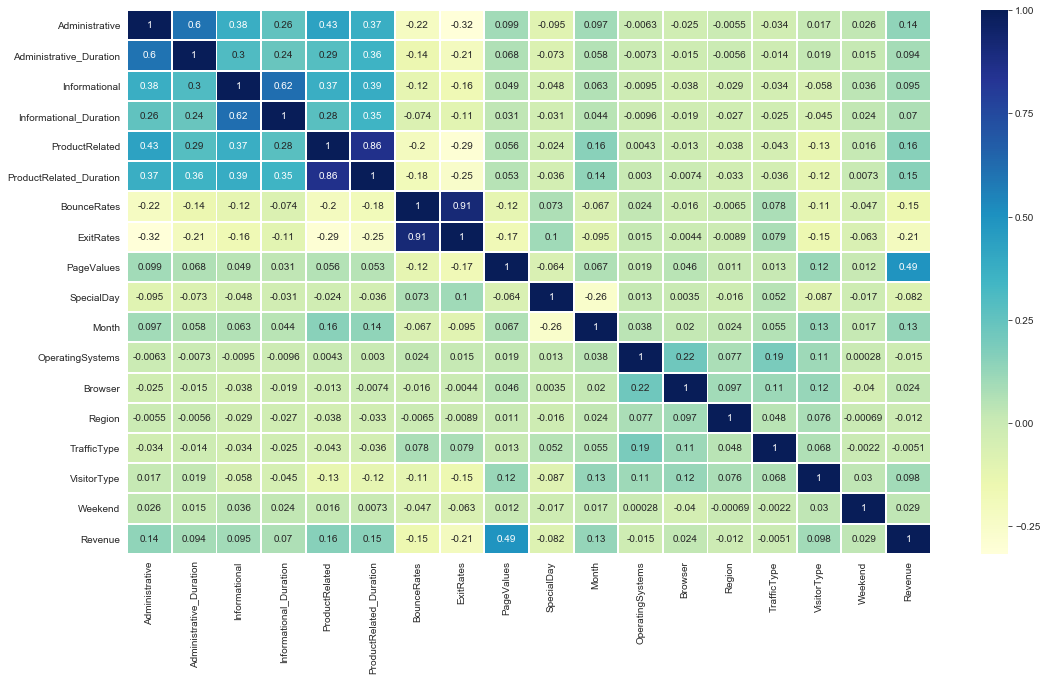

In [12]:
# calculating the correlation and plotting the heatmap of correlation dataframe

df_corr = df_onlineShoppers.corr(method='pearson')
plt.figure(figsize = (18,10))
g = sns.heatmap(df_corr, cbar=True,cmap="YlGnBu", linewidths=0.9,annot=True)
g

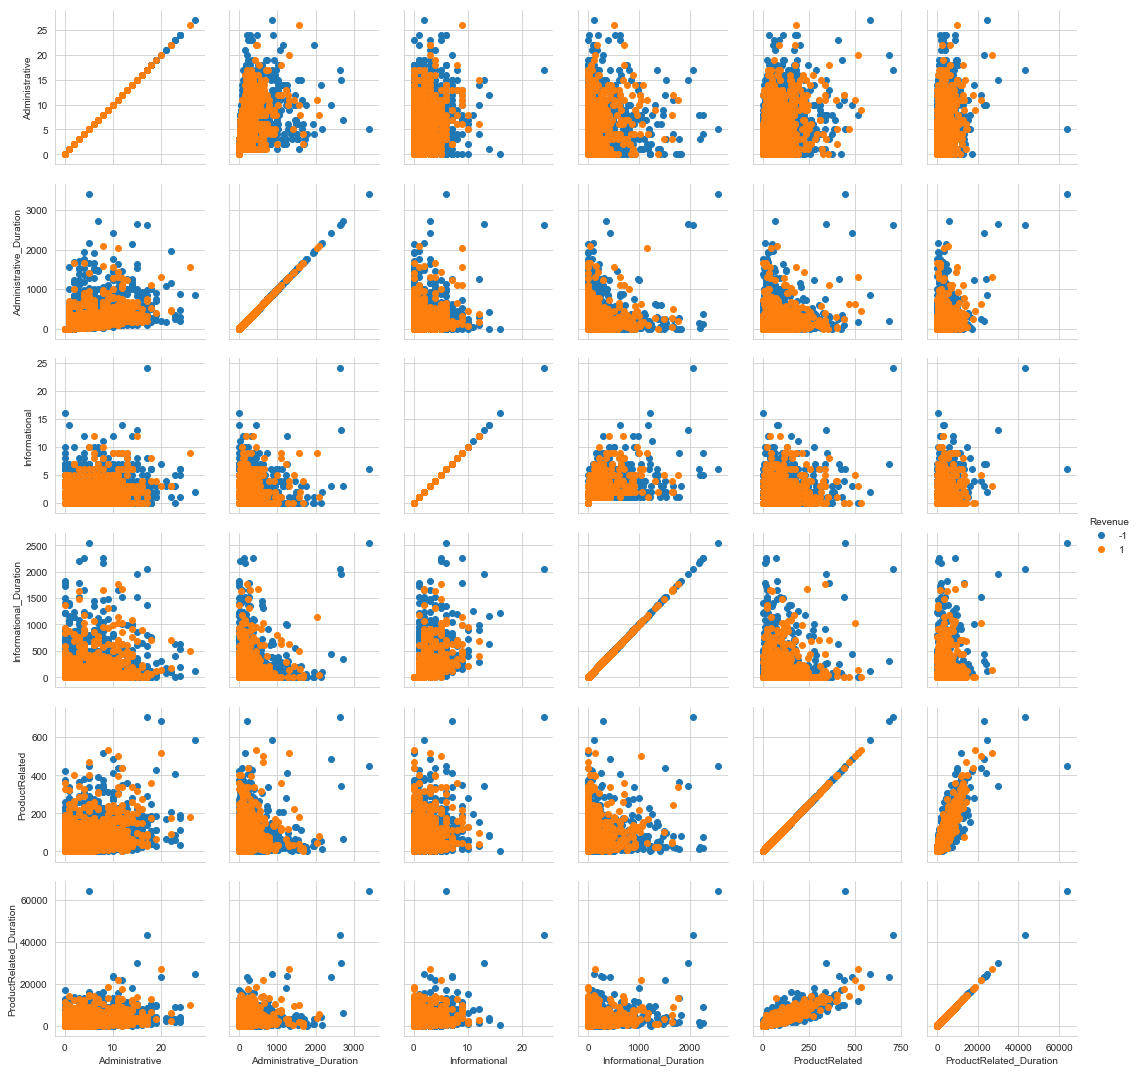

In [13]:
# Plotting pair plots for 'Administrative', 'Administrative_Duration', 'Informational',
# 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration' features to check the patterns among them

g = sns.PairGrid(df_onlineShoppers, vars=[ 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'], hue="Revenue")
g.map(plt.scatter);
g.add_legend();

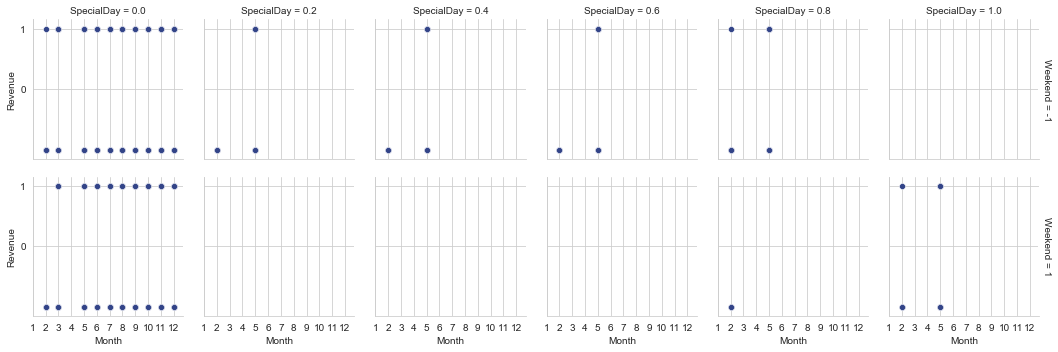

In [14]:
g = sns.FacetGrid(df_onlineShoppers, col="SpecialDay", row="Weekend", margin_titles=True, height=2.5)
g.map(plt.scatter, "Month", "Revenue", color="#334488", edgecolor="white", lw=.5 );
g.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], yticks=[0,1]);

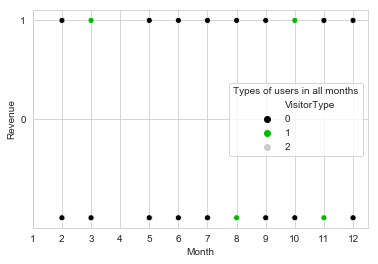

In [15]:
g = sns.scatterplot(data = df_onlineShoppers, x='Month', y= 'Revenue', hue='VisitorType', palette='nipy_spectral' )
g.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], yticks=[0,1]);
plt.legend(title='Types of users in all months', loc='center right')

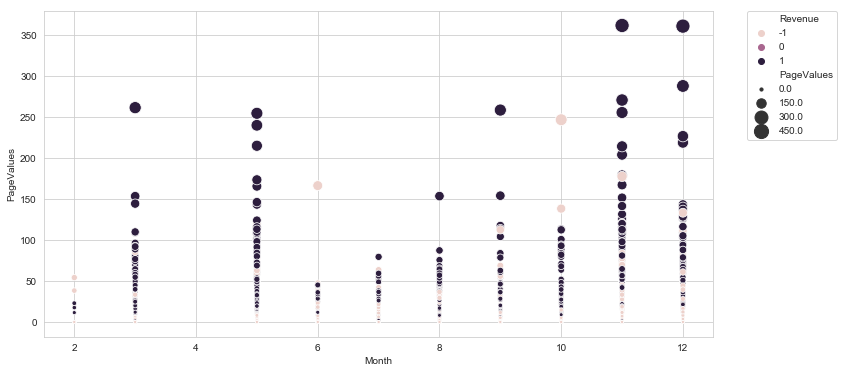

In [16]:
#sns.countplot(data = df_onlineShoppers , x= "TrafficType", hue="Revenue")
plt.figure(figsize = (12,6))
sns.scatterplot(data = df_onlineShoppers , x= "Month", y ="PageValues", hue="Revenue", sizes=(10,200), size="PageValues")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

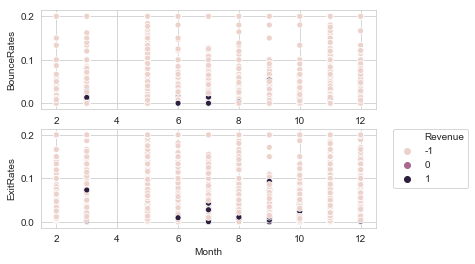

In [17]:
f, axes = plt.subplots(2,1)
g = sns.scatterplot(x='Month', y='BounceRates',hue='Revenue', data=df_onlineShoppers, ax= axes[0], lw=1.5, legend=False )
g = sns.scatterplot(x='Month', y='ExitRates', hue='Revenue', data=df_onlineShoppers, ax= axes[1], lw=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

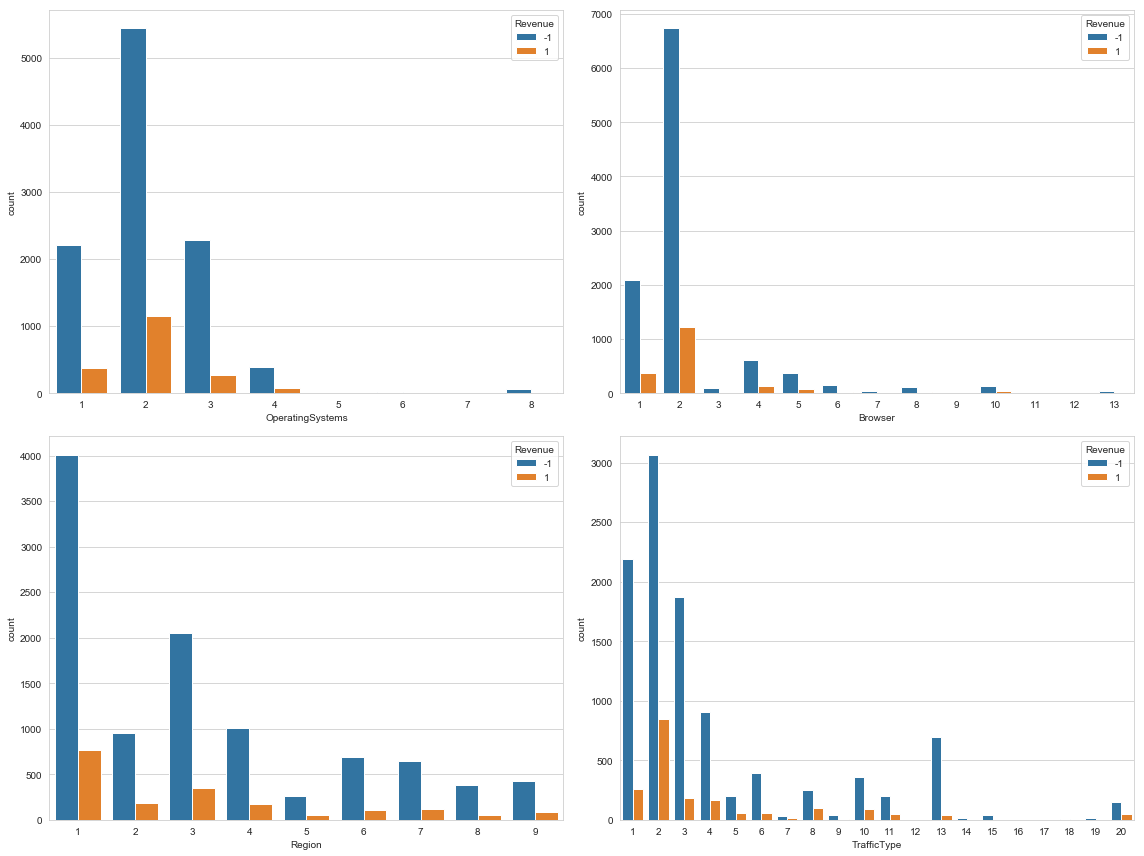

In [18]:
fig = plt.figure(figsize=(16,12))
plt.clf()
col =['OperatingSystems', 'Browser', 'Region', 'TrafficType']
for i in range(4):
    plt.subplot(2,2,i+1 )
    sns.countplot(data = df_onlineShoppers, hue = 'Revenue', x = col[i])
    plt.xlabel(col[i])
fig.tight_layout()

## Preliminary observation

The dataset is not evenly distributed, the positive input instances are about 1/10 (approx.) of dataset, 9/10 being the negative instances. The features - Administrative,	Administrative_Duration, Informational, Informational_Duration	ProductRelated and ProductRelated_Duration have high correlation, which makes sense -if user hit more number of administrative pages in a session the more time spent and this applies to other categories of pages. And the variation with target 'Revenue', the less the time spent in Administrative pages, the more is the Revenue. Most of the special days are in Feburary and May, and user may not make a purchase on weekends if special day probability is greater than 0 and less than 1. Also, user may not make any purchase in on weekends in February unless its the most special day. New users come during the months - March, August, October and November. And they even makes first time purchases in March and October. One feature that has highest simarility with target 'Revenue' is 'PageValues', the more the value of this feature, the more its certain that Revenue is true. The BounceRates and ExitRates have similar patterns through various months and obviously the lower the BounceRates, ExitRates the more the Revenue since user has to be on website, browse options and then make a purchase. 

# III. Method

## Review of the 4 Classification Models 


### Pocket Algorithm

Pocket Algorithm is a modification of perceptron algorithm. Perceptron Algorithm as its name suggests is based on perceptron which takes an input and computes the aggregated sum based and returns a binary output either 0 or 1 based on wheather the aggregated sum is greater than or less than a threshold value. In perceptron algorithm train phase, the ouput is computed by multiplying the weight w with input instace $x_i$, resulting in $y_i$
For a positive class, $t_i$ =1, 
$$
y_i = w^{(k)} x_i  < 0
$$

So to correct the weight $w^{(k)}$,
$$
 w^{(k+1)} x_i >  w^{(k)} x_i.
$$

This can be reached by using $x_i$ as a gradient as follows: 
$$
w^{(k+1)} = w^{(k)} + \alpha x_i
$$

The same sceanrios of misclassification in case of Negative case, we do the opposite. 

$$
 w^{(k+1)} x_i <  w^{(k)} x_i.
$$

Combining both cases, the gradient can be written as, 
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

In this algorithm, with each iteration the $w$ is being updated and the solution i.e the the descision boundary at end of convergence of this algorithm might not be the best one. So to obtain the best descision boundary, the $w$ with best accuracy is stored in memory (refered as pocket) $w_{pocket}$.


### Quadratic Discriminant Analysis

QDA is a generative model which generate values for the observations and target. It is based on Bayes rule and gaussian distribution. This algorithm estimate the joint distribution $P(X, T)$ for the input $X$ and the target labels $T$. 
joint distribution can be wriiten in terms of the conditional probabilty, 

$$
 P(X, T) = P(X \mid T) P(T) = P(T \mid X) P(X)
$$

And derving the following by balancing two equations which consitute joint probability

$$
  P(T \mid X) = \frac{P(X \mid T) P(T)}{P(X)}
$$

Based on equation above, the probability of target being class $k$ given input $x_i$ is 

$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\
\end{align*}
$$

And from given data, the prior probability $P(T=k)$ and ${P(X=x_i)}$ can be computed. To compute the likelyhood term, it is assumed that data is gaussian and we have the following equation, where $\boldsymbol\mu_k$ and $\boldsymbol\Sigma_k$ are mean and covariance of class $k$

$$
p(x \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) }
$$

Pluggin this in previous equation, we have
$$
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }
$$


Discriminant analysis for binary classification just states that for a given sample the probability of it belongining to one class is grater than the other, say classes are positive and negative then this statement can be mathematically represented as


$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$

Substibuting the previous eq, and ignoring priors as thats constant on both sides
$$
\begin{align*}
  \Big( \vert \boldsymbol\Sigma_+ \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (x - \boldsymbol\mu_+)} P(T = +1)  &>
  \Big( \vert \boldsymbol\Sigma_- \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (x - \boldsymbol\mu_-)} P(T = -1) 
\end{align*}
$$


Logarithm can remove exponent and multiplication for easier computation:

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (x - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (x - \boldsymbol\mu_-) + \ln P(T = -1)
$$


$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

The two terms on either side of inequality are the deciding factors, which are same equations for different mean and covariance for each calss. They are called as discriminants. Now to predict the class for a new sample, both of the discriminants needs to be calculated and the ouput is the class whose discriminat is maximum.

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

Since the $\delta_k$ function is quadratic in $x$ and the decision boundary is quadratic, hence the name Quadratic Discriminant Analysis (QDA).

### Linear Discriminant Analysis

In simple words Linear discriminant analysis is, Quadratic discriminant analysis when covariance is same for both determinants.

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In QDA, every class has its own covariance matrix. Having covariance matrix for each class is costly and data being under sampled which causes hifg cahnce of Over fitting in decision boundoury. LDA avoids these problems by having a linear descion boundary with single covariance matrix for all classes.


### Logistic Regression


Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of sending out the result directly like the Linear Regression model does, it outputs the logistic of this result. This logistic is computed by passing the output through an activation function. 

$$
 z  = X w
$$

$$
y = h(z)
$$



Activation function is a function which computes the class based on some soft of logic. Some examples for activation functions are sigmoid, relu and softmax.

Sigmoid function S of input z, the range is always beteween 0 and 1, which makes this perfect for binary classification. 
$$
s(z) = \frac{1}{1+ e^{-z} }
$$

Rectified Linear Unit(ReLU), unlike sigmoid has a range between 0 and infinity which makes this not best choice of activation function for Logiistic regression.
$$
f(z) = max(0,z)
$$

Softmax function, outputs the probability of input belonging to all classes. And output of logistic regression can be the class with maximum probability. This activation function works best in case of multi class classification.

$$
g_k(X) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

Now to get the optional solution, we equate the derivative of cost function to zero. we then get that, where $t$ is target label

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$


To use softmax function as activation function for multi class classification, the indiator matrix of target needs to be computed.

## Explanation of Algorithm Implementations


First we import the python libraries - numpy, pandas, matplotlib, abc (Abstract Base Class) which are required to implement the classification algorithms. Using ABC and abstractmethod, a superclass called 'BaseModel' is created which has train and use as abstract methods. All the classes which inherit this class must have the train and use certainly and can have methods of its own. 

'Classifier' is the class which inherits Super class BaseModel. This class has concrete methods 'normalize', 'check_matrix', 'add_ones' along with the abstract methods from 'BaseModel'class 'train' and 'use'. Both of these methods are not implemented in 'Classifier', they are abstract methods. And a class having one or more abstarct methods is an Abstract class. Any other classes which inherit 'Classifier' class and would need to have a class instance must implement the abstarct methods 'train' and 'use'. Also, any class which inherits 'Classifier' can use or overwrite the concrete methods - 'normalize', 'check_matrix' and 'add_ones'. The normalize method calculates the feature wise mean and standard deviation from train dataset and standardizing the train and test datasets by substracting mean and then dividing with standard deviation. The check_matrix method is used as a sanity check to affirm if the input passed is a matrix not vector. The add_ones method just adds a column full of 1's to input.

To implement Pocket Algorithm, first the Classifier class is inherited to use its methods and then methods train and use are defined. In train method, first the input is normalized, a bias column of ones is added, weight $w$ is intialized and then start the iteration where in each iteration, the output of every input instance is computed and based on which the $w$ is modified. This continues untill the it reaches the end of iterations or converge. It will converge when it does not need to change the $w$. So in train function, basically the weight $w$ is computed. And in use funtion, the input is normalized, bias is added, the predictions are computed by multipliying the every instance with $w$ and passing it through a sign function. Under this implementation it is required that classes must be position and negative. 

To implement Quadratic discriminant analysis, first the Classifier class is inherited to use its methods and then methods train and use are defined. In train method, the input is normalized and then input passed is grouped based on class. Mean $\mu$, Covariance $\Sigma$ and prior probability are computed for each class. This class another method QDA which computes the discriminant. In use function, the input is normalized and discriminant for each class is computed. The output is predicted by comparing the discriminats. The class with maximum discriminant value is the output.

The implementation of Linear discriminant analysis is same as QDA expect the covariance is calculated before grouping to classes in train function. And the LDA method of this class is same as QDA which computed discriminant function.

To implement logistic regression classifier, firstly the Classifier class is inherited to use its methods and then methods train and use are defined. The activation function used for implementation is Softmax function, which is implemented as a method. And another method $g$ computes the prediction by passing the product of input $x_i$ and weight $w$. In train method, the $w$ is computed iterating over every instance computing the prediction and modifying the w by multipliying the difference in actual target and predicted value by a learning rate $\alpha$ and input instance, as shown in last equation of logistic regression.


### A. Super Classs Definition

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from abc import ABC, abstractmethod

In [20]:
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        """
            Initiazing the class
        """
        self.meanX = None
        self.stdX = None
        

    def normalize(self, X, flag):
        """ standardize the input X  """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
        
        if flag == "train":
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)
       

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        
        return Xs
    
    

    def _check_matrix(self, mat, name):
        """
            Making Sure its a Matrix not vector
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
            
            
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [120]:
class Pocket(Classifier):
    def __init__(self, alpha, maxiter):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        
    def compare(self, X, T):
        y = np.sign(X @ self.w)
        yp = np.sign(X @ self.w_pocket)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    def train(self, X, T):
        X = self.normalize(X, "train")
        print("Normalized")
        X1 = self.add_ones(X)
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = np.zeros(X1.shape[1])
    
        print("Entering loop")
        for i in range(self.maxiter):
            converged = True
            for k in np.random.permutation(X1.shape[0]): #range(N):
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X1[k]
                    converged = False
                    if self.compare(X1, T) > 0:
                        self.w_pocket[:] = self.w[:]
                        #print(self.w_pocket[:])
                        
            if converged:
                print("converged at ", i)
                break

    def use(self, X):
        X = self.normalize(X, "test")
        X1 = self.add_ones(X)
        return np.sign(X1@self.w)

### C. QDA

In [22]:
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        
        
    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)  
        
    def train(self, X, T):
        X = self.normalize(X, "train")
        # get classes
        self.classes = np.unique(T)
        
        #group inputs based on class
        class1 = []
        class2 = []
        for i in range(len(T)):
            if T[i] == self.classes[0]:
                class1.append(X[:][i])
            else:
                class2.append(X[:][i])
        
        self.class_groups= [np.asarray(class1), np.asarray(class2)]
        
        self.mu=[]
        self.sigma = []
        self.counts = []
        for x in self.class_groups:
            self.mu.append(np.mean(x,0))
            self.sigma.append(np.cov(x.T))
            self.counts.append(x.shape[0])
        
        self.priors = []
        for x in self.counts:
            self.priors.append(x/sum(self.counts))
        
        
        
    def use(self, X):
        X = self.normalize(X, "test")
        y_pred = []
        d1 =  self.QDA(X, self.mu[0], self.sigma[0], self.priors[0])
        d2 =  self.QDA(X, self.mu[1], self.sigma[1], self.priors[1])
        for i in range(len(d1)):
            if d1[i] >d2[i]:
                y_pred.append(self.classes[0])
            else:
                y_pred.append(self.classes[1])
        return y_pred

### D. LDA

In [23]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        
        
    def LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)  
        
    def train(self, X, T):
        X = self.normalize(X, "train")
        # get classes
        self.classes = np.unique(T)
        
        # calculate covariance
        self.sigma = (np.cov(X.T))
        
        #group inputs based on class
        class1 = []
        class2 = []
        for i in range(len(T)):
            if T[i] == self.classes[0]:
                class1.append(X[:][i])
            else:
                class2.append(X[:][i])
        
        self.class_groups= [np.asarray(class1), np.asarray(class2)]
        
        self.mu=[]
        self.counts = []
        for x in self.class_groups:
            self.mu.append(np.mean(x,0))
            self.counts.append(x.shape[0])
        
        self.priors = []
        for x in self.counts:
            self.priors.append(x/sum(self.counts))
        
        
    def use(self, X):
        X = self.normalize(X, "test")
        y_pred = []
        d1 =  self.LDA(X, self.mu[0], self.sigma, self.priors[0])
        d2 =  self.LDA(X, self.mu[1], self.sigma, self.priors[1])
        for i in range(len(d1)):
            if d1[i] >d2[i]:
                y_pred.append(self.classes[0])
            else:
                y_pred.append(self.classes[1])
        return y_pred

### E. Logistic Regression

In [24]:
class LogisticRegression(Classifier):
    def __init__(self,niter, alpha):
        Classifier.__init__(self)
        self.w = None
        self.niter = niter
        self.alpha = alpha
        
    def g(self, X):
        return self.softmax(X@self.w)
        
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

        
    def train(self, X, T):
        X = self.normalize(X, "train")
        X1 = self.add_ones(X)
        k = T.shape[1]
        d = X.shape[1]
        self.w = np.random.rand(d+1,k)
        #print(self.w)
        for step in range(self.niter):
            ys = self.g(X1)
            self.w += self.alpha * (X1.T @ (T - ys))
            #print(self.w)
        
    def use(self, X):
        X = self.normalize(X, "test")
        X1 = self.add_ones(X)
        y = self.g(X1)
        return np.argmax(y, 1)

## Evaluation Metrics

It is difficult to measure how good a model works for a classification problem with a single metric, say accuracy. Accuracy can only determine how well are correct predictions. It does not state what type of errors the classifier made or how well the underlying distribution of classes classified. So we have many metrics, each is a measure of particular characteristic. Mentioned below are some most commonly used metrics.

Accuracy: The most easiest metric, which measures the percentage of correct predictions.

Confussion Matrix: This gives the count of True positives(TP), True negatives(TN), False positives(FP) and False negatives(FN).
True Positives(TP) accounts for instances which are of positive class and are correctly predicted as positive class. True Negatives (TN) accounts for instances which are of negative class and are correctly predicted as negative class. False Positives (FP) accounts for instances which are of negative class but falsely predicted as positive class. This is also known as Type 1 error. False Negatives (FN) accounts for instances which are of positive class but are falsely predicted as negative class. This is also known as Type 2 error.


<table>
    <tr>
    <td> - </td>
    <td> + </td>
    </tr>
    <tr>
    <td>TN</td>
    <td>FN</td>
    </tr>
    <tr>
    <td>FP</td>
    <td>TP</td>
    </tr>
</table>




Recall: It is the measure of how well the model covers the actual positive class.
$$
recall = \frac{TP}{TP+FN}
$$

Precision: It is the measure of how well the predicted positive class is classified.
$$
precision = \frac{TP}{TP+FP}
$$

F1 score: Harmonic mean of precision and recall.

$$
f1_score = \frac{2*Precision*Recall}{Precision+Recall}
$$


Precision Recall (P-R)Curves:  PR curves are preferable when the positive class is rare or when you care more about the false positives than the false negatives. This curve shows the tradeoff between precision and recall for different threshold. A high area under the curve (AUC) represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results


Classification report: The sklearn method of this metric defines the precision, recall, f1 score for individual classes.

In [353]:
### using sklearn library to measure Classification Metrics 
from sklearn.metrics import confusion_matrix,  precision_recall_curve, average_precision_score, classification_report
def Metrics(Y, T):
    confusion = confusion_matrix(Y,T)
    print("Confussion Matrix is" )
    print(confusion)
    #print("\n")
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    print("Classification Report")
    print(classification_report(T, Y))
    accuracy_score = ((TP + TN) / float(TP + TN + FP + FN))
    print("accuracy score: {:.2f}%".format(100 * accuracy_score))
    recall = (TP / float(FN + TP))
    print("sensitivity (or recall): {:.2f}%".format(100 * recall))
    precision = (TP / float(TP + FP))
    print("precision: {:.2f}%".format(100 * precision))
    f1 = (2*recall*precision)/(precision+recall)
    print("f1 score: {:.2f}%".format(100 * f1))
    fpr, tpr, thresholds = precision_recall_curve(T, Y)
    auc_score = average_precision_score(T,Y)
    #print(auc)
    print("auc score: {:.2f}%".format(100 * auc_score))
    return {"accuray":accuracy_score, "precision":precision, "recall":recall, "f1":f1, "auc":auc_score, "fpr":fpr,"tpr":tpr}

## Sample Data


In [354]:
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3
C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

# Train Set
X_train = np.vstack((C1[:30], C2[:30]))
N_train = X_train.shape[0]
T_train = np.ones(N_train)
T_train[:(N_train//2)] *= -1 

# Test Set
X_test = np.vstack((C1[30:], C2[30:]))
N_test = X_test.shape[0]
T_test = np.ones(N_test)
T_test[:(N_test//2)] *= -1

## Pocket Algorithm Testcase

In [355]:
Poc = Pocket(0.001, 100)
Poc.train(X_train, T_train)

Normalized
Entering loop


In [356]:
Y_pred_poc = Poc.use(X_test)
print("Train Metrics")
PocTrainMetrics = Metrics(Poc.use(X_train), T_train)
print("\n")
print("Test Metrics")
PocTestMetrics = Metrics(Y_pred_poc, T_test)

Train Metrics
Confussion Matrix is
[[29  3]
 [ 1 27]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.91      0.97      0.94        30
         1.0       0.96      0.90      0.93        30

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

accuracy score: 93.33%
sensitivity (or recall): 96.43%
precision: 90.00%
f1 score: 93.10%
auc score: 91.79%


Test Metrics
Confussion Matrix is
[[19  1]
 [ 1 19]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95        20
         1.0       0.95      0.95      0.95        20

   micro avg       0.95      0.95      0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

accuracy score: 95.00%
sensitivity (or recall): 95.00%
precision: 95.00%
f1 score: 95

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

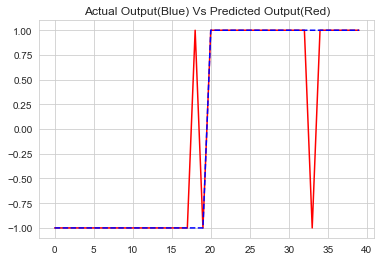

In [357]:
plt.plot(Y_pred_poc, 'r-')
plt.plot(T_test , 'b--')
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

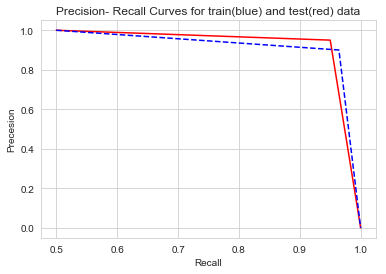

In [358]:
poc_test_fpr = PocTestMetrics['fpr']
poc_test_tpr = PocTestMetrics['tpr']
poc_train_fpr = PocTrainMetrics['fpr']
poc_train_tpr = PocTrainMetrics['tpr']
plt.plot(poc_test_fpr, poc_test_tpr, "r-")
plt.plot(poc_train_fpr, poc_train_tpr ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis

The algorithm did not converge but stopped after iteration. And the 4 samples predicted wrong in train dataset explains the classifier does not have high variance. And the classifier generalizes test data well and has better metrics compared to train dataset which can be interpreted from train, test accuary values and PR Curves for train and test data. With auc as 93% for test data, this classifier worked well.


## Quadratic Discriminant Analysis (QDA) Algorithm Testcase

In [359]:
qda_al = QDA()
qda_al.train(X_train, T_train)

In [360]:
y_pred_qda = qda_al.use(X_test)
print("Train Metrics")
qdaTrainMetrics = Metrics(qda_al.use(X_train), T_train)
print("\n")
print("Test Metrics")
qdaTestMetrics = Metrics(y_pred_qda, T_test)

Train Metrics
Confussion Matrix is
[[28  4]
 [ 2 26]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.88      0.93      0.90        30
         1.0       0.93      0.87      0.90        30

   micro avg       0.90      0.90      0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

accuracy score: 90.00%
sensitivity (or recall): 92.86%
precision: 86.67%
f1 score: 89.66%
auc score: 87.14%


Test Metrics
Confussion Matrix is
[[19  0]
 [ 1 20]]
Classification Report
              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

   micro avg       0.97      0.97      0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

accuracy score: 97.50%
sensitivity (or recall): 95.24%
precision: 100.00%
f1 score: 9

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

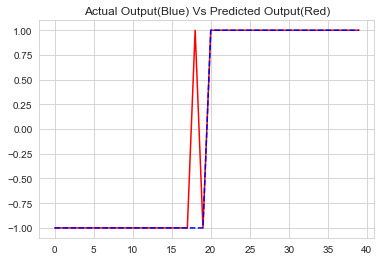

In [361]:
plt.plot(y_pred_qda, 'r-')
plt.plot(T_test , 'b--')
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

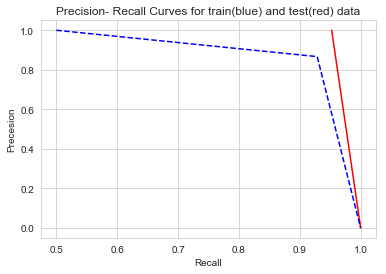

In [362]:
qda_test_fpr = qdaTestMetrics['fpr']
qda_test_tpr = qdaTestMetrics['tpr']
qda_train_fpr = qdaTrainMetrics['fpr']
qda_train_tpr = qdaTrainMetrics['tpr']
plt.plot(qda_test_fpr, qda_test_tpr, "r-")
plt.plot(qda_train_fpr, qda_train_tpr ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis

This QDA classifier does not have high variance. The classifier generalizes test data well and has better metrics compared to train dataset which can be interpreted from train, test accuary values and PR Curves for train and test data. It only misclassifies one sample. For this random dataset, it is better that pocket algorithm as it as more area under curve of 95%

## Linear Discriminant Analysis (LDA) Algorithm Testcase

In [363]:
lda_al = LDA()
lda_al.train(X_train, T_train)

In [372]:
y_pred_lda = lda_al.use(X_test)
print("Train Metrics")
ldaTrainMetrics=Metrics(lda_al.use(X_train), T_train)
print("\n")
print("Test Metrics")
ldaTestMetrics = Metrics(y_pred_lda, T_test)

Train Metrics
Confussion Matrix is
[[28  4]
 [ 2 26]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.88      0.93      0.90        30
         1.0       0.93      0.87      0.90        30

   micro avg       0.90      0.90      0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

accuracy score: 90.00%
sensitivity (or recall): 92.86%
precision: 86.67%
f1 score: 89.66%
auc score: 87.14%


Test Metrics
Confussion Matrix is
[[19  0]
 [ 1 20]]
Classification Report
              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

   micro avg       0.97      0.97      0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

accuracy score: 97.50%
sensitivity (or recall): 95.24%
precision: 100.00%
f1 score: 9

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

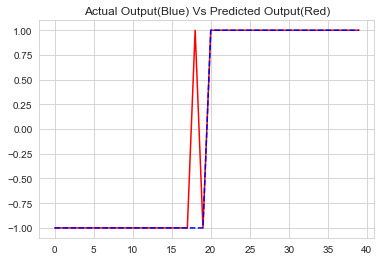

In [373]:
plt.plot(y_pred_lda, 'r-')
plt.plot(T_test , 'b--')
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

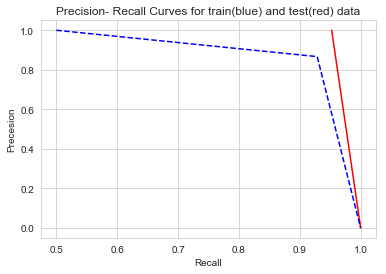

In [374]:
lda_test_fpr = ldaTestMetrics['fpr']
lda_test_tpr = ldaTestMetrics['tpr']
lda_train_fpr = ldaTrainMetrics['fpr']
lda_train_tpr = ldaTrainMetrics['tpr']
plt.plot(lda_test_fpr, lda_test_tpr, "r-")
plt.plot(lda_train_fpr, lda_train_tpr ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis

This LDA classifier worked same as QDA. Probably beacuse the random data is linearly separable.
The classifier generalizes test data well and has better metrics compared to train dataset which can be interpreted from train, test accuary values and PR Curves for train and test data. It only misclassifies one sample. For this random dataset, it is better that pocket algorithm as it as more area under curve of 95%

## Logistic Regression Testcase

In [367]:
def create_indicator_mat(T):
    ind_mat = []
    for x in T:
        if x==-1:
            ind_mat.append([0,1])
        else:
            ind_mat.append([1,0])      
    return np.asarray(ind_mat)

In [368]:
logR = LogisticRegression(600, 0.01)
T_train1 = create_indicator_mat(T_train)
T_test1 = create_indicator_mat(T_test)
logR.train(X_train, T_train1)

In [377]:
T_train2 = np.argmax(T_train1, 1)
T_test2 = np.argmax(T_test1, 1)
y_pred_lr = logR.use(X_test)
print("Train Metrics")
lrTrainMetrics = Metrics(logR.use(X_train), T_train2)
print("\n")
print("Test Metrics")
lrTestMetrics = Metrics(y_pred_lr, T_test2)

Train Metrics
Confussion Matrix is
[[27  3]
 [ 3 27]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        30

   micro avg       0.90      0.90      0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

accuracy score: 90.00%
sensitivity (or recall): 90.00%
precision: 90.00%
f1 score: 90.00%
auc score: 86.00%


Test Metrics
Confussion Matrix is
[[20  1]
 [ 0 19]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

   micro avg       0.97      0.97      0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

accuracy score: 97.50%
sensitivity (or recall): 100.00%
precision: 95.00%
f1 score: 9

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

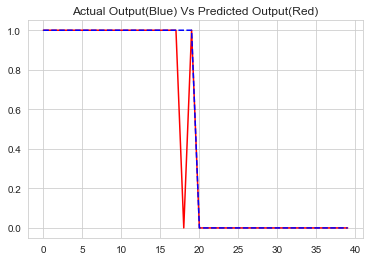

In [376]:
plt.plot(y_pred_lr, 'r-')
plt.plot(T_test2, 'b--')
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

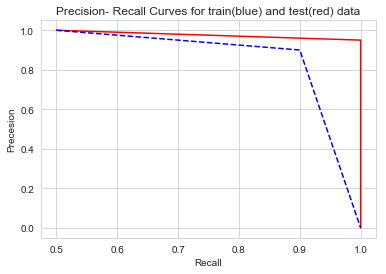

In [378]:
lr_test_fpr = lrTestMetrics['fpr']
lr_test_tpr = lrTestMetrics['tpr']
lr_train_fpr = lrTrainMetrics['fpr']
lr_train_tpr = lrTrainMetrics['tpr']
plt.plot(lr_test_fpr, lr_test_tpr, "r-")
plt.plot(lr_train_fpr, lr_train_tpr ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis

This classifier works best. The classifier generalizes test data well and has better metrics compared to train dataset which can be interpreted from train, test accuary values and PR Curves for train and test data. It only misclassifies one sample. For this random dataset, with area under curve of 97%

# IV. Experiments

Applying the classfiers on the data and discussing the results.


In [282]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
df_onlineShoppers = shuffle(df_onlineShoppers)
df_train, df_test = train_test_split(df_onlineShoppers, test_size=0.2)

Y_train = df_train['Revenue']
Y_test = df_test['Revenue']
X_train = df_train.drop('Revenue', 1)
X_test = df_test.drop('Revenue', 1) 

X_train_mat = X_train.as_matrix()
X_test_mat = X_test.as_matrix()
Y_train_mat = Y_train.as_matrix()
Y_test_mat = Y_test.as_matrix()

# X_train_mat = X_train.values()
# X_test_mat = X_test.values()
# Y_train_mat = Y_train.values()
# Y_test_mat = Y_test.values()

print(Y_train_mat.shape)
print(Y_test_mat.shape)

Y_train_mat = Y_train_mat.reshape(-1,1)
print(Y_train_mat.shape)
Y_test_mat = Y_test_mat.reshape(-1,1)
print(Y_test_mat.shape)

(9864,)
(2466,)
(9864, 1)
(2466, 1)


In [283]:
df_train.Revenue.value_counts()

-1    8330
 1    1534
Name: Revenue, dtype: int64

In [284]:
df_test.Revenue.value_counts()

-1    2092
 1     374
Name: Revenue, dtype: int64

In [285]:
len(df_onlineShoppers)*0.8

9864.0

In [286]:
df_train.Revenue.value_counts()

-1    8330
 1    1534
Name: Revenue, dtype: int64

In [287]:
df_onlineShoppers.Revenue.value_counts()

-1    10422
 1     1908
Name: Revenue, dtype: int64

In [288]:
1908*0.8

1526.4

## Pocket Algorithm


In [254]:
Poc1 = Pocket(0.0001, 2)
Poc1.train(X_train_mat, Y_train_mat)

Normalized
Entering loop


In [379]:
import pickle

# Write to pickle
# file = open('pocket', 'wb')
# pickle.dump(Poc1, file)
# file.close()

# Read from pickle
file = open('pocket', 'rb')
Poc1 = pickle.load(file)
file.close()

In [380]:
y_pred_poc1 = Poc1.use(X_test_mat)
print("Train Metrics")
PocTrainMetrics1 = Metrics(Poc1.use(X_train_mat), Y_train)
print("\n")
print("Test Metrics")
PocTestMetrics1 = Metrics(y_pred_poc1, Y_test)

Train Metrics
Confussion Matrix is
[[6784  698]
 [1546  836]]
Classification Report
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      8330
           1       0.35      0.54      0.43      1534

   micro avg       0.77      0.77      0.77      9864
   macro avg       0.63      0.68      0.64      9864
weighted avg       0.82      0.77      0.79      9864

accuracy score: 77.25%
sensitivity (or recall): 35.10%
precision: 54.50%
f1 score: 42.70%
auc score: 26.20%


Test Metrics
Confussion Matrix is
[[1705  177]
 [ 387  197]]
Classification Report
              precision    recall  f1-score   support

          -1       0.91      0.82      0.86      2092
           1       0.34      0.53      0.41       374

   micro avg       0.77      0.77      0.77      2466
   macro avg       0.62      0.67      0.63      2466
weighted avg       0.82      0.77      0.79      2466

accuracy score: 77.13%
sensitivity (or recall): 33.73%
precision: 52.

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

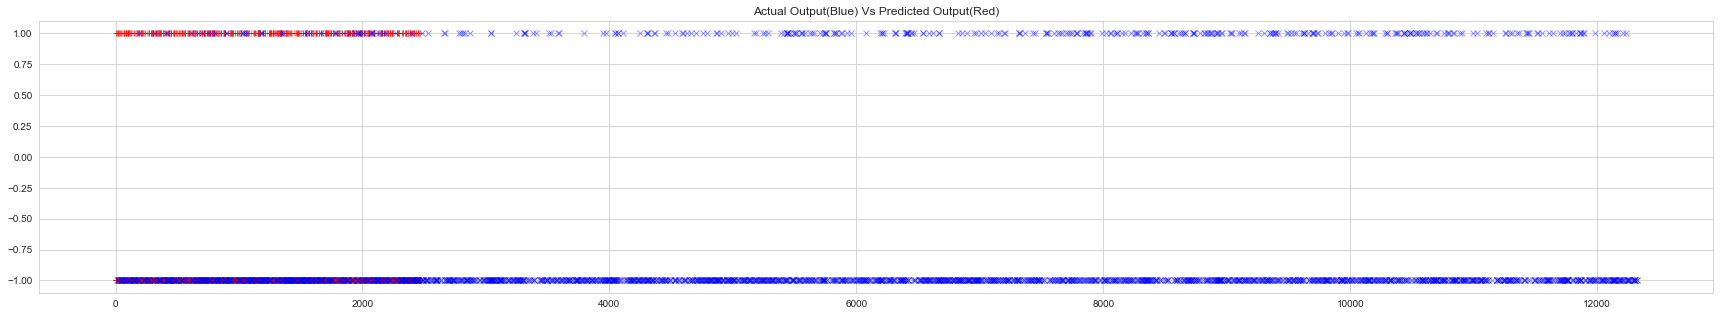

In [381]:
plt.figure(figsize=(30,5))
plt.plot(y_pred_poc1, 'r+',alpha=0.4)
plt.plot(Y_test , 'bx', alpha=0.4)
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

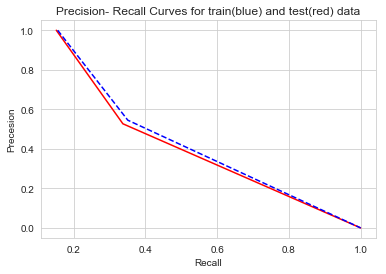

In [382]:
poc_test_fpr1 = PocTestMetrics1['fpr']
poc_test_tpr1 = PocTestMetrics1['tpr']

poc_train_fpr1 = PocTrainMetrics1['fpr']
poc_train_tpr1 = PocTrainMetrics1['tpr']

plt.plot(poc_test_fpr1, poc_test_tpr1, "r-")
plt.plot(poc_train_fpr1, poc_train_tpr1 ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis

From train metrics, it can be said that the model is not tranined well. It has low train accuracy of 77.25%. From confussion matrix, it can be seen that it did not train well positive class which has very less samples compared to its competitive class. 
From the classification report values, it can be seen the values of precision and recall are 0.35 and .51 for positie class, which decreases the overall mertrics of model. This model is underfitting.


## QDA

In [383]:
qda_al1 = QDA()
qda_al1.train(X_train_mat, Y_train_mat)

In [384]:
y_pred_qda1 = qda_al1.use(X_test_mat)
print("Train Metrics")
qdaTrainMetrics1 = Metrics(qda_al1.use(X_train_mat), Y_train)
print("\n")
print("Test Metrics")
qdaTestMetrics1 = Metrics(y_pred_qda1, Y_test)

Train Metrics
Confussion Matrix is
[[7297  610]
 [1033  924]]
Classification Report
              precision    recall  f1-score   support

          -1       0.92      0.88      0.90      8330
           1       0.47      0.60      0.53      1534

   micro avg       0.83      0.83      0.83      9864
   macro avg       0.70      0.74      0.71      9864
weighted avg       0.85      0.83      0.84      9864

accuracy score: 83.34%
sensitivity (or recall): 47.22%
precision: 60.23%
f1 score: 52.94%
auc score: 34.62%


Test Metrics
Confussion Matrix is
[[1822  150]
 [ 270  224]]
Classification Report
              precision    recall  f1-score   support

          -1       0.92      0.87      0.90      2092
           1       0.45      0.60      0.52       374

   micro avg       0.83      0.83      0.83      2466
   macro avg       0.69      0.73      0.71      2466
weighted avg       0.85      0.83      0.84      2466

accuracy score: 82.97%
sensitivity (or recall): 45.34%
precision: 59.

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

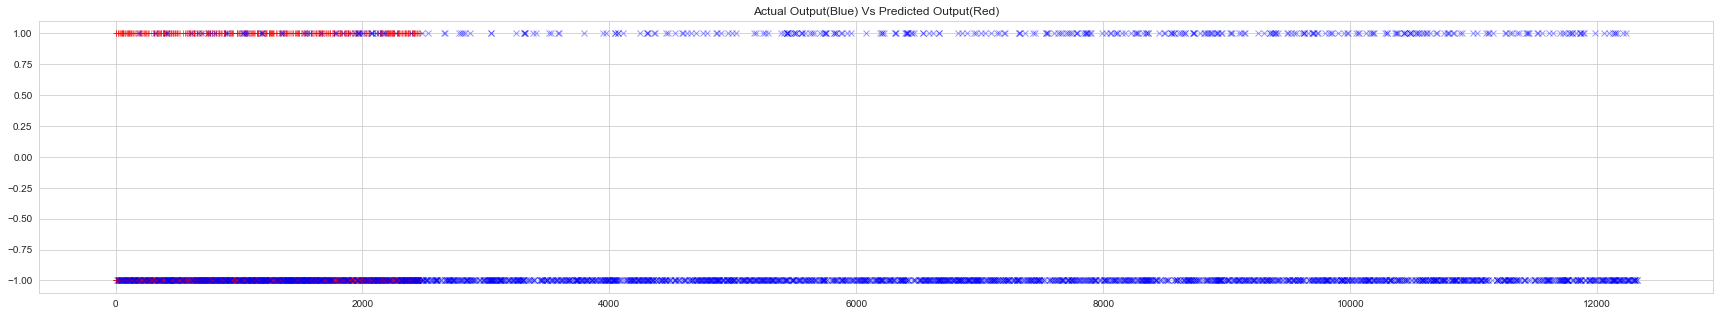

In [385]:
plt.figure(figsize=(30,5))
plt.plot(y_pred_qda1, 'r+',alpha=0.4)
plt.plot(Y_test , 'bx', alpha=0.4)
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

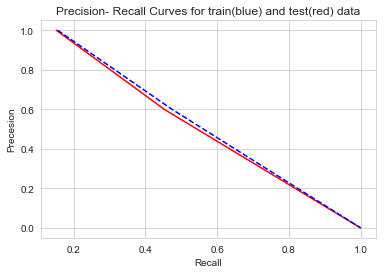

In [386]:
qda_test_fpr1 = qdaTestMetrics1['fpr']
qda_test_tpr1 = qdaTestMetrics1['tpr']

qda_train_fpr1 = qdaTrainMetrics1['fpr']
qda_train_tpr1 = qdaTrainMetrics1['tpr']

plt.plot(qda_test_fpr1, qda_test_tpr1, "r-")
plt.plot(qda_train_fpr1, qda_train_tpr1 ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis
From train metrics, it can be said that the model is better than pocket algorithm but can be made better. It has train accuracy of 83%. From confussion matrix, it can be seen that it did not train well positive class which has very less samples compared to its competitive class. From the classification report values, it can be seen the values of precision and recall are 0.35 and .51 for positive class, which decreases the overall mertrics of model. The test accuracy is same as train accuracy. Maybe if positive class is oversampled a bit and train again on new data, there might be significant improvements. As it does good with one class.

## LDA

In [387]:
lda_al1 = LDA()
lda_al1.train(X_train_mat, Y_train_mat)


In [388]:
y_pred_lda1 = lda_al1.use(X_test_mat)
print("Train Metrics")
ldaTrainMetrics1 = Metrics(lda_al1.use(X_train_mat), Y_train)
print("\n")
print("Test Metrics")
ldaTestMetrics1 = Metrics(y_pred_lda1, Y_test)

Train Metrics
Confussion Matrix is
[[8216 1130]
 [ 114  404]]
Classification Report
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93      8330
           1       0.78      0.26      0.39      1534

   micro avg       0.87      0.87      0.87      9864
   macro avg       0.83      0.62      0.66      9864
weighted avg       0.86      0.87      0.85      9864

accuracy score: 87.39%
sensitivity (or recall): 77.99%
precision: 26.34%
f1 score: 39.38%
auc score: 32.00%


Test Metrics
Confussion Matrix is
[[2074  288]
 [  18   86]]
Classification Report
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93      2092
           1       0.83      0.23      0.36       374

   micro avg       0.88      0.88      0.88      2466
   macro avg       0.85      0.61      0.65      2466
weighted avg       0.87      0.88      0.84      2466

accuracy score: 87.59%
sensitivity (or recall): 82.69%
precision: 22.

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

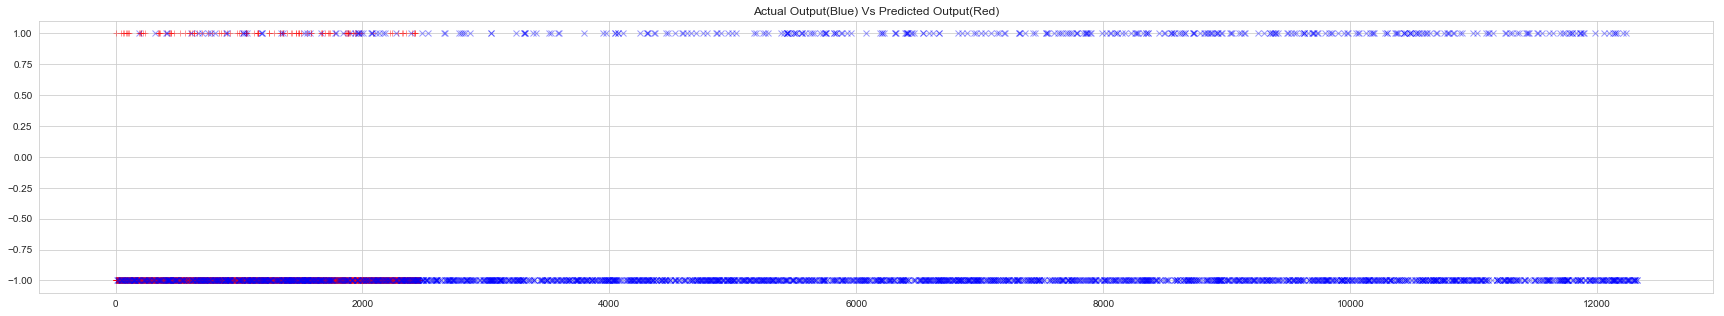

In [389]:
plt.figure(figsize=(30,5))
plt.plot(y_pred_lda1, 'r+',alpha=0.4)
plt.plot(Y_test , 'bx', alpha=0.4)
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

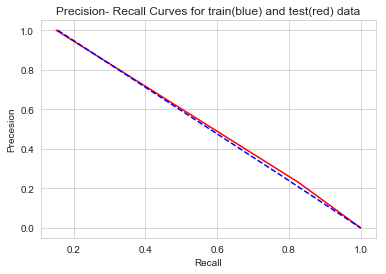

In [390]:
lda_test_fpr1 = ldaTestMetrics1['fpr']
lda_test_tpr1 = ldaTestMetrics1['tpr']

lda_train_fpr1 = ldaTrainMetrics1['fpr']
lda_train_tpr1 = ldaTrainMetrics1['tpr']

plt.plot(lda_test_fpr1, lda_test_tpr1, "r-")
plt.plot(lda_train_fpr1, lda_train_tpr1 ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Result Analysis
This algorithm worked quite well expect it is very picky. It has good accuracy and precision but low recall. It correctly identifies the positive class and negative class for all samples but it assumes most of the samples are negative class. The recall for positive class is quite less. If somehow that is improved. It can achieve better results.


## Logistic Regression

In [391]:
logR1 = LogisticRegression(1000, 0.001)
Y_train1 = create_indicator_mat(Y_train_mat)
Y_test1 = create_indicator_mat(Y_test_mat)
logR1.train(X_train_mat, Y_train1)

In [392]:
Y_train2 = np.argmax(Y_train1, 1)
Y_test2 = np.argmax(Y_test1, 1)

y_pred_lr1 = logR1.use(X_test_mat)
print("Train Metrics")
lrTrainMetrics1 = Metrics(logR1.use(X_train_mat), Y_train2)
print("\n")
print("Test Metrics")
lrTestMetrics1 = Metrics(y_pred_lr1, Y_test2)

Train Metrics
Confussion Matrix is
[[ 563  905]
 [ 971 7425]]
Classification Report
              precision    recall  f1-score   support

           0       0.38      0.37      0.38      1534
           1       0.88      0.89      0.89      8330

   micro avg       0.81      0.81      0.81      9864
   macro avg       0.63      0.63      0.63      9864
weighted avg       0.81      0.81      0.81      9864

accuracy score: 80.98%
sensitivity (or recall): 88.43%
precision: 89.14%
f1 score: 88.78%
auc score: 88.00%


Test Metrics
Confussion Matrix is
[[ 125  214]
 [ 249 1878]]
Classification Report
              precision    recall  f1-score   support

           0       0.37      0.33      0.35       374
           1       0.88      0.90      0.89      2092

   micro avg       0.81      0.81      0.81      2466
   macro avg       0.63      0.62      0.62      2466
weighted avg       0.80      0.81      0.81      2466

accuracy score: 81.22%
sensitivity (or recall): 88.29%
precision: 89.

Text(0.5, 1.0, 'Actual Output(Blue) Vs Predicted Output(Red)')

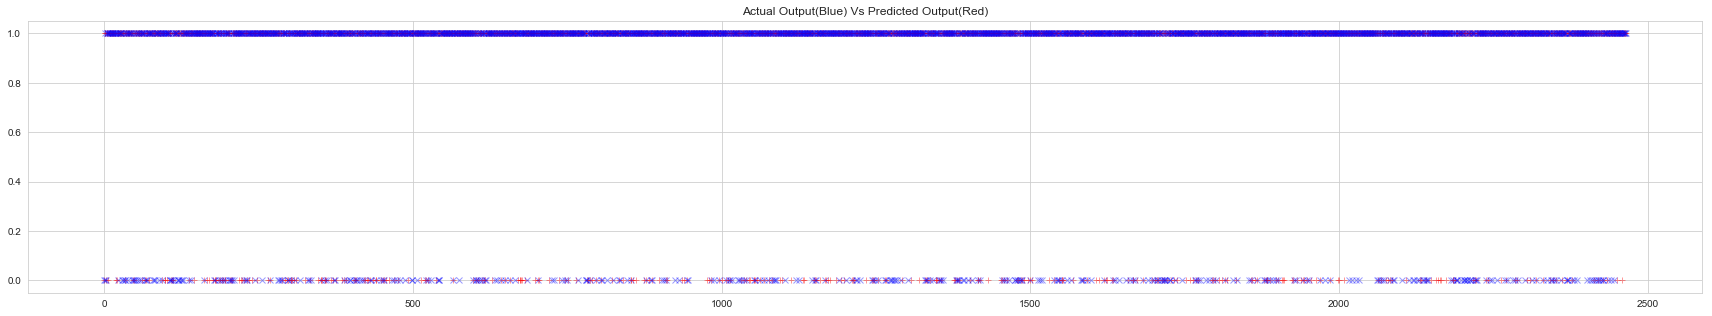

In [393]:
plt.figure(figsize=(30,5))
plt.plot(y_pred_lr1, 'r+',alpha=0.4)
plt.plot(Y_test2, 'bx',alpha=0.4)
plt.title("Actual Output(Blue) Vs Predicted Output(Red)")

Text(0.5, 1.0, 'Precision- Recall Curves for train(blue) and test(red) data')

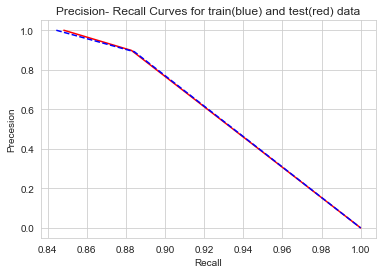

In [394]:
lr_test_fpr1 = lrTestMetrics1['fpr']
lr_test_tpr1 = lrTestMetrics1['tpr']

lr_train_fpr1 = lrTrainMetrics1['fpr']
lr_train_tpr1 = lrTrainMetrics1['tpr']

plt.plot(lr_test_fpr1, lr_test_tpr1, "r-")
plt.plot(lr_train_fpr1, lr_train_tpr1 ,"b--")
plt.xlabel("Recall")
plt.ylabel("Precesion")
plt.title("Precision- Recall Curves for train(blue) and test(red) data")

### Results Analysis

Solving the bianry classification problem by converting it to a multiclass classification with logistric regression using softmax as activation function really did a trick here to tackle the challenge of imbalanced dataset. This model has good overall accuracy, precision , recall , f1 score and area under precion recall curve compared to rest of the algorithms.


### Classification Summary

<table>
<tr>
    <td> <b>Classifier</b> </td>
    <td> <b>Accuracy</b>  </td>
    <td> <b>Precision </b> </td>
    <td> <b>Recall</b>  </td>
    <td> <b>F1 Score</b> </td>
    <td> <b>AUC</b> </td>
</tr>

<tr>
    <td><b>Pocket Algorithm</b></td>
<td> 77.13% </td>
<td> 33.73% </td>
<td> 52.67% </td>
<td> 41.13% </td>
<td> 24.95% </td>
</tr>

<tr>
    <td><b>QDA</b></td>
<td> 82.97% </td>
<td> 45.34% </td>
<td> 59.89% </td>
<td> 51.61% </td>
<td> 33.24% </td>
</tr>

<tr>
    <td> <b>LDA</b> </td>
<td> 87.59% </td>
<td> 82.69% </td>
<td> 22.99% </td>
<td> 35.98% </td>
<td> 30.69% </td>
</tr>

<tr>
    <td><b>Logistic Regression </b></td>
<td> 81.22% </td>
<td> 88.29% </td>
<td> 89.77% </td>
<td> 89.03% </td>
<td> 87.94% </td>
</tr>

</table>

# Conclusions

The Online Shoppers intension dataset which presents a problem to classify wheather the user will add upto revenue or not based on user's profile and behaviour. The challenging part of this problem is imbalanced dataset. The ratio of negative to positive class is 9:1 (approx). From table mentioned above, it can be seen that Logistic regression with softmax activation function works best and pocket algorithm has the least performance. LDA can have better results if recall is increased by sapling techniques. 

# References

List all your references here.

1. Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)

2. https://www.ritchieng.com/machine-learning-evaluate-classification-model/

3. https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

4. https://datascience.stackexchange.com/questions/28426/train-accuracy-vs-test-accuracy-vs-confusion-matrix/28427 

5. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 